# Notebook R d'exemple utilisant l'API SAS Viya

## 1) On déclare la librairie SWAT permettant d'utiliser l'API R fournie par SAS Viya

In [92]:
library(swat)

## 2) Connexion au moteur CAS (Cloud Analytic Services) in-memory de la plateforme de Service Analytique SAS Viya

In [93]:
Sys.setenv(CAS_CLIENT_SSL_CA_LIST = "/opt/viyacerts/trustedcerts.pem")
conn <- CAS('viya-2021-5', 5570)

# Activate session parameters if necessary
loadActionSet(conn, "fedSql")
cas.sessionProp.setSessOpt(conn, timeout=1800, caslib='casuser')

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).

NOTE: Added action set 'fedSql'.

NOTE: Information for action set 'fedSql':

NOTE:    fedSql

NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution

NOTE: 'CASUSER(viyademo01)' is now the active caslib.



list()

## 3) On liste toutes les tables de SAS Viya visibles pour l'utlisateur (sécurité)  pour une librairie CAS particulière

In [97]:
cas.table.tableInfo(conn,caslib="bdfdata")$TableInfo$Name

[1] "EJ"                      "DTM_FACT_EJ"            
 [3] "DTM_DIM_GEO"             "BDF_USECASE1_DTM"       
 [5] "DTM_DIM_NIVEAU_GEO"      "DTM_DIM_NIVEAU_ACTIVITE"
 [7] "INDICATEURS"             "INDICATEURSL"           
 [9] "BRANCHE"                 "DEPT"                   
[11] "COMMUNE"                 "REGION"                 
[13] "ACTV_INSEE"              "DIM_REGROUP_TERRIT"     
[15] "DIM_ACT_REG_NAF"         "DTM_DIM_ACT"            
[17] "DTM_DIM_ACT_FILTRAGE"

## 4) On référence une table CAS dans l'environnement R et on peut déléguer les calculs à SAS Viya comme indiqué avec les quelques exemples ci-dessous

In [98]:
# Table DTM_FACT_EJ : 30 Go, 61 millions de records
casTbl <- defCasTable(conn, tablename="DTM_FACT_EJ", caslib="bdfdata")

### 4.1 Certaines fonctions R de base sont automatiquement déléguée à SAS Viya pour l'exécution dans le moteur CAS via des actions natives (Logique de Wrapper)

In [99]:
head(casTbl)

ACTV_BDF_SS_CLA,ANNEE,BIL_CA,BIL_CAP_PROPRE,BIL_CAP_SOC,BIL_CHP,BIL_EFFT,BIL_EFI,BIL_ENDETTEMENT,BIL_FPN,⋯,SORTIE_BIL_PER_SUIV,SORTIE_PER,SORTIE_PER_SUIV,TR_AGE,TR_EFFT,TR_EFFT_CAHT_TOT_BIL,TR_EFFT_REGT,UA_COMP,UA_GEST,cat_bil
6820B,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,525,525,
7311Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,00,N,1,547,547,
6831Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,257,596,
4399C,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,596,596,
6820B,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,123,185,
0812Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,00,N,1,525,525,


In [100]:
names(casTbl)

[1] "ACTV_BDF_SS_CLA"      "ANNEE"                "BIL_CA"              
 [4] "BIL_CAP_PROPRE"       "BIL_CAP_SOC"          "BIL_CHP"             
 [7] "BIL_EFFT"             "BIL_EFI"              "BIL_ENDETTEMENT"     
[10] "BIL_FPN"              "BIL_IBG"              "BIL_IMMO_CORP"       
[13] "BIL_IMMO_FIN"         "BIL_TOT_BIL"          "BIL_VA"              
[16] "CD_SPHERE"            "CJ"                   "CLA_SCORE"           
[19] "COMMUNE"              "D_EVT_SORTIE"         "DC_EJ"               
[22] "DENOM_EJ"             "DF_FIN_EX_BIL"        "DMJ_ZIP"             
[25] "DUR_EX_CPTABLE"       "ENT_DEFAIL"           "ENTREE_BIL_PER"      
[28] "ENTREE_PER"           "ETAT_EJ"              "IND_MULTI_ETS"       
[31] "INTENS_TECH"          "LIEN_GP"              "MOT_ENTREE_BIL"      
[34] "MOT_SORTIE"           "MOT_SORTIE_BIL"       "NAT_JUR"             
[37] "SEG_COT"              "SIREN_EJ"             "SOC_COTEE_BOURSE"    
[40] "SORTIE_BIL_PER_SUIV"  "SORTIE_PER"           "SORTIE_PER_SUIV"     
[43] "TR_AGE"               "TR_EFFT"              "TR_EFFT_CAHT_TOT_BIL"
[46] "TR_EFFT_REGT"         "UA_COMP"              "UA_GEST"             
[49] "cat_bil"

In [101]:
dim(casTbl)

[1] 61037936       49

In [102]:
colMeans(casTbl)

ANNEE          BIL_CA  BIL_CAP_PROPRE     BIL_CAP_SOC         BIL_CHP 
   2.017662e+03    1.141474e+04    1.008223e+04    3.141674e+03    2.094249e+03 
       BIL_EFFT         BIL_EFI BIL_ENDETTEMENT         BIL_FPN         BIL_IBG 
   4.067785e+01    8.708264e+03    2.151523e+03    1.040294e+04    3.134453e+03 
  BIL_IMMO_CORP    BIL_IMMO_FIN     BIL_TOT_BIL          BIL_VA  DUR_EX_CPTABLE 
   3.788073e+03    1.035226e+04    2.343471e+04    2.905807e+03    1.200819e+01 
       SIREN_EJ         UA_COMP         UA_GEST 
   5.207383e+08    6.504783e+02    6.541893e+02

In [103]:
mean(casTbl$BIL_CAP_PROPRE)

[1] 10082.23

In [104]:
nrow(casTbl)

[1] 61037936

In [105]:
summary(casTbl)

 ACTV_BDF_SS_CLA      ANNEE          BIL_CA         BIL_CAP_PROPRE    
 0111Z: 1306730   Min.   :2014   Min.   :       0   Min.   :-4809565  
 5610A: 1311040   1st Qu.:2016   1st Qu.:     841   1st Qu.:     184  
 6420Z: 1265858   Median :2018   Median :    1589   Median :     519  
 6820A: 2840434   Mean   :2018   Mean   :   11415   Mean   :   10082  
 6820B:12108751   3rd Qu.:2020   3rd Qu.:    3790   3rd Qu.:    1457  
 9499Z: 3292272   Max.   :2021   Max.   :65017505   Max.   :62703000  
                                 NA's   :59474290   NA's   :59474290  
  BIL_CAP_SOC          BIL_CHP            BIL_EFFT            BIL_EFI        
 Min.   : -182777   Min.   :       0   Min.   :0.000e+00   Min.   :  -37833  
 1st Qu.:      15   1st Qu.:     159   1st Qu.:3.000e+00   1st Qu.:      48  
 Median :      78   Median :     416   Median :9.000e+00   Median :     217  
 Mean   :    3142   Mean   :    2094   Mean   :4.068e+01   Mean   :    8708  
 3rd Qu.:     308   3rd Qu.:     972   3rd

### 4.2) Les actions CAS plus avancées peuvent être invoquées directement en tant que nouvelles fonctions R disponibles (tout sera calculé à l'échelle dans le moteur CAS sans déplacer les données de l'environnement SAS Viya)

In [106]:
cas.simple.distinct(conn,  table = list(caslib="bdfdata",name="DTM_FACT_EJ"),  inputs = c("ACTV_BDF_SS_CLA","COMMUNE","SIREN_EJ"))

Column,NDistinct,NMiss,Trunc
ACTV_BDF_SS_CLA,732,0,0
COMMUNE,36763,0,0
SIREN_EJ,9141573,0,0


In [107]:
cas.simple.freq(conn, table = list(caslib="bdfdata",name="DTM_FACT_EJ"), inputs = c("ACTV_BDF_SS_CLA"))

Column,CharVar,FmtVar,Level,Frequency
ACTV_BDF_SS_CLA,0111Z,0111Z,1,1306730
ACTV_BDF_SS_CLA,0112Z,0112Z,1,954
ACTV_BDF_SS_CLA,0113Z,0113Z,1,130414
ACTV_BDF_SS_CLA,0114Z,0114Z,1,17143
ACTV_BDF_SS_CLA,0115Z,0115Z,1,1413
ACTV_BDF_SS_CLA,0116Z,0116Z,1,199
ACTV_BDF_SS_CLA,0119Z,0119Z,1,35452
ACTV_BDF_SS_CLA,0121Z,0121Z,1,539710
ACTV_BDF_SS_CLA,0122Z,0122Z,1,7943
ACTV_BDF_SS_CLA,0123Z,0123Z,1,1187


In [108]:
cas.fedSql.execDirect(conn, query="select count(*) from bdfdata.dtm_fact_ej")

COUNT
61037936


## 5) On peut aussi récupérer les données de SAS Viya sous forme de dataframe R (en faisant attention à la volumétrie traitable par le moteur R). 
Ensuite fonctions et librairies R habituelles des utilisateurs pourront être utilisées. Les données pourront être par la suite envoyées simplement vers le serveur SAS Viya pour un partage sécurisé de ces données aux autres utilisateurs par exemple.

In [115]:
dfR <- to.casDataFrame(casTbl, obs = 100000)

In [116]:
head(dfR)

ACTV_BDF_SS_CLA,ANNEE,BIL_CA,BIL_CAP_PROPRE,BIL_CAP_SOC,BIL_CHP,BIL_EFFT,BIL_EFI,BIL_ENDETTEMENT,BIL_FPN,⋯,SORTIE_BIL_PER_SUIV,SORTIE_PER,SORTIE_PER_SUIV,TR_AGE,TR_EFFT,TR_EFFT_CAHT_TOT_BIL,TR_EFFT_REGT,UA_COMP,UA_GEST,cat_bil
6820B,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,525,525,
7311Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,00,N,1,547,547,
6831Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,257,596,
4399C,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,596,596,
6820B,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,NN,N,N,123,185,
0812Z,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,N,N,N,2,00,N,1,525,525,


In [117]:
dim(dfR)

[1] 100000     49

In [118]:
summary(dfR)

 ACTV_BDF_SS_CLA        ANNEE          BIL_CA       BIL_CAP_PROPRE   
 Length:100000      Min.   :2014   Min.   :     0   Min.   : -62780  
 Class :character   1st Qu.:2015   1st Qu.:   837   1st Qu.:    185  
 Mode  :character   Median :2018   Median :  1525   Median :    498  
                    Mean   :2018   Mean   :  6646   Mean   :  13535  
                    3rd Qu.:2020   3rd Qu.:  3611   3rd Qu.:   1393  
                    Max.   :2021   Max.   :787353   Max.   :9283193  
                                   NA's   :97287    NA's   :97287    
  BIL_CAP_SOC         BIL_CHP          BIL_EFFT           BIL_EFI        
 Min.   :    -82   Min.   :     0   Min.   :    0.00   Min.   :       0  
 1st Qu.:     15   1st Qu.:   163   1st Qu.:    3.00   1st Qu.:      49  
 Median :     79   Median :   396   Median :    8.00   Median :     209  
 Mean   :   2504   Mean   :  1522   Mean   :   32.97   Mean   :   16125  
 3rd Qu.:    300   3rd Qu.:   899   3rd Qu.:   19.00   3rd Qu.:     76

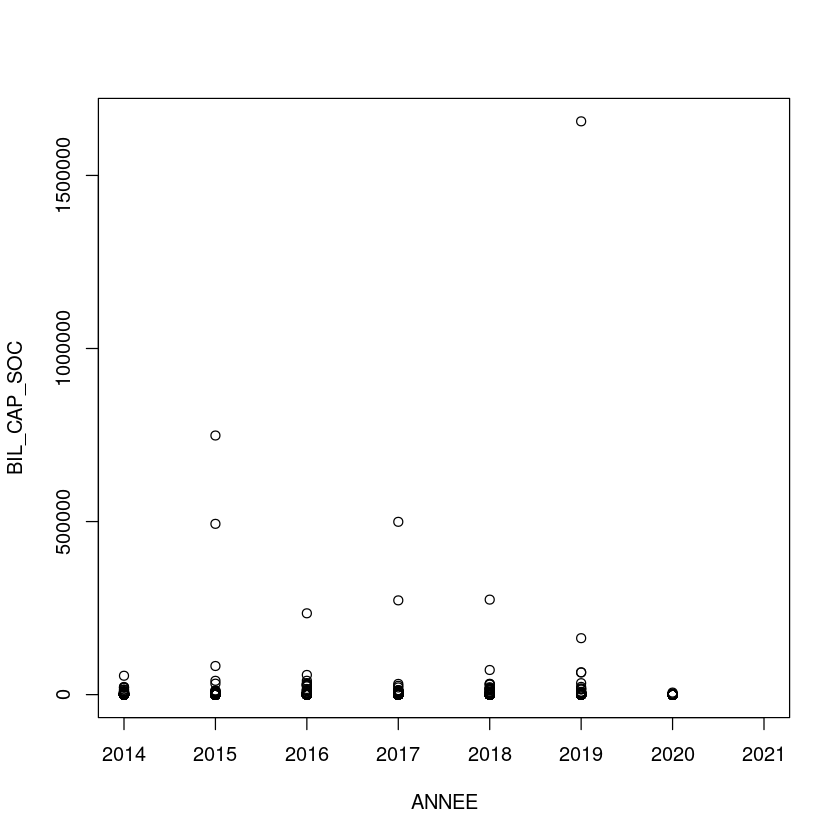

In [125]:
plot(dfR[c("ANNEE","BIL_CAP_SOC")])

# On ferme le session en cours sur l'environnement SAS Viya (sinon un timeout sera appliqué pour fermer automatiquement la session  sur inactivité)

In [126]:
cas.session.endSession(conn)

list()